# Estudo de Caso -> Análise de Crédito!

#### Importando as bibliotecas necessárias

In [128]:
!pip install yellowbrick

In [129]:
# Bibliotecas para análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Bibliotecas para modelagem de dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Etapa 1: Análise dos dados

Análise dos dados envolve a exploração e o tratamento inicial das informações disponíveis, identificando padrões, inconsistências e potenciais correlações para fundamentar análises futuras.

### Informações sobre os arquivos

<b>application_record.csv</b>: : Contém informações pessoais que podem ser utilizadas para aprimorar o modelo de dados. Esses dados são fundamentais para entender o perfil dos solicitantes e podem influenciar diretamente as previsões e o desempenho do modelo, permitindo uma personalização mais precisa e eficaz das soluções oferecidas.

<b>credit_record.csv</b>: : Contém dados sobre o comportamento de pagamento do cartão de crédito dos clientes. Esta base é fundamental para análises de crédito, permitindo a identificação de padrões de comportamento que influenciam o risco de crédito.


### Dicionário das colunas

#### application_record.csv

1. **ID**: Código único do cliente
2. **CODE_GENDER**: Gênero do cliente
3. **FLAG_OWN_CAR**: O cliente possui carro?
4. **FLAG_OWN_REALTY**: Possui uma moradia própria?
5. **CNT_CHILDREN**: Quantidade de filhos
6. **AMT_INCOME_TOTAL**: Renda anual
7. **NAME_INCOME_TYPE**: Categoria da Renda
8. **NAME_EDUCATION_TYPE**: Escolaridade
9. **NAME_FAMILY_STATUS**: Estado Civil
10. **NAME_HOUSING_TYPE**: Tipo de residência
11. **DAYS_BIRTH**: Aniversário
12. **DAYS_EMPLOYED**: Data de início no emprego
13. **FLAG_MOBIL**: Possui telefone celular?
14. **FLAG_WORK_PHONE**: Possui telefone corporativo?
15. **FLAG_PHONE**: Possui telefone fixo?
16. **FLAG_EMAIL**: Possui email?
17. **OCCUPATION_TYPE**: Tipo de ocupação
18. **CNT_FAM_MEMBERS**: Quantidade de pessoas na família

#### credit_record.csv

1. **ID**: Código único do cliente
2. **MONTHS_BALANCE**: O mês dos dados extraídos e o ponto de partida, para trás, 0 é o mês atual, -1 é o mês anterior e assim por diante
3. **STATUS**: 
   - 0: 1-29 dias em atraso
   - 1: 30-59 dias em atraso
   - 2: 60-89 dias em atraso
   - 3: 90-119 dias em atraso
   - 4: 120-149 dias em atraso
   - 5: dívidas vencidas ou incobráveis, baixas por mais de 150 dias
   - C: quitado naquele mês
   - X: nenhum empréstimo para o mês

#### Importando os arquivos

In [130]:
# Importa os arquivos e armazena os dados em DataFrames
application_record = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

### Análise dos dados

#### Análise exploratória dos dados

A análise exploratória de dados é uma etapa crucial em qualquer projeto de ciência de dados que visa entender as características principais dos dados, identificar padrões, anomalias, e verificar suposições através de estatísticas resumidas e visualizações gráficas.

#### Conhecendo o dataset application_df

In [131]:
# Exibindo as 5 primeiras linhas do dataset 'application_record'
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [132]:
# Imprime o número total de linhas e colunas no dataset 'application_df'
print(f'O dataset application_record contém um total de {application_record.shape[0]} linhas.')
print(f'O dataset application_record contém um total de {application_record.shape[1]} colunas.')

O dataset application_record contém um total de 438557 linhas.
O dataset application_record contém um total de 18 colunas.


In [133]:
# Obtém o número de elementos (linhas * colunas) no DataFrame application_record
print(f'O dataset application_record contém um total de {application_record.size} elementos.')

O dataset application_record contém um total de 7894026 elementos.


In [134]:
# Obtém todos os nomes dos campos de 'application_record'
application_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [135]:
# Exibe informações detalhadas sobre o dataset application_record, 
# incluindo o número de entradas não nulas e os tipos de dados de cada coluna
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [136]:
# Gera uma visão geral das estatísticas descritivas para cada coluna numérica do DataFrame 'credit_record'
# As estatísticas incluem contagem (count), média (mean), desvio padrão (std), valores mínimos (min),
# valores máximos (max) e os quartis (25%, 50%, 75%)
# O método T realiza a transposição, convertendo as linhas em colunas e as colunas em linhas, facilitando a visualização
application_record.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


#### Conhecedo o dataset credit_record

In [137]:
# Exibindo as 5 primeiras linhas do dataset 'credit_record'
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [138]:
# Imprime o número total de linhas e colunas no dataset 'credit_record'
print(f'O dataset credit_record contém um total de {credit_record.shape[0]} linhas.')
print(f'O dataset credit_record contém um total de {credit_record.shape[1]} colunas.')

O dataset credit_record contém um total de 1048575 linhas.
O dataset credit_record contém um total de 3 colunas.


In [139]:
# Obtém o número de elementos (linhas * colunas) no DataFrame 'credit_record'
print(f'O dataset credit_record contém um total de {credit_record.size} elementos.')

O dataset credit_record contém um total de 3145725 elementos.


In [140]:
# Obtém todos os nomes dos campos de 'credit_record '
credit_record.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [141]:
# Exibe informações detalhadas sobre o dataset credit_record, 
# incluindo o número de entradas não nulas e os tipos de dados de cada coluna
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [142]:
# Gera uma visão geral das estatísticas descritivas para cada coluna numérica do DataFrame 'credit_record'
# As estatísticas incluem contagem (count), média (mean), desvio padrão (std), valores mínimos (min),
# valores máximos (max) e os quartis (25%, 50%, 75%)
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


#### Verificando variavéis nulas no DataFrame 'application_record'

Ao verificar variáveis nulas no DataFrame 'application_record', é possível identificar colunas com dados ausentes, o que é crucial para preparar e limpar os dados para  as análises e modelagens subsequentes.

In [143]:
# Verifica a quantidade de valores ausentes em cada coluna
application_record.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [144]:
# Verifica a porcentagem de valores ausentes em cada coluna
round(application_record.isnull().sum()/application_record.shape[0] * 100, 2).sort_values(ascending = False)

OCCUPATION_TYPE        30.6
ID                      0.0
CODE_GENDER             0.0
FLAG_EMAIL              0.0
FLAG_PHONE              0.0
FLAG_WORK_PHONE         0.0
FLAG_MOBIL              0.0
DAYS_EMPLOYED           0.0
DAYS_BIRTH              0.0
NAME_HOUSING_TYPE       0.0
NAME_FAMILY_STATUS      0.0
NAME_EDUCATION_TYPE     0.0
NAME_INCOME_TYPE        0.0
AMT_INCOME_TOTAL        0.0
CNT_CHILDREN            0.0
FLAG_OWN_REALTY         0.0
FLAG_OWN_CAR            0.0
CNT_FAM_MEMBERS         0.0
dtype: float64

- A variável 'OCCUPATION_TYPE' apresenta uma significativa quantidade de dados ausentes, com <b>30,6%</b> dos seus valores sendo nulos. Para tratar esses dados, os valores nulos serão substituídos por uma categoria alternativa, 'Unspecified occupation', a fim de manter a integridade da análise.

In [145]:
# Preenche os valores ausentes (NaN) na coluna 'OCCUPATION_TYPE' com 'Unspecified occupation'
# A opção inplace=True faz a modificação diretamente no DataFrame original
application_record['OCCUPATION_TYPE'].fillna(value = 'Unspecified occupation', inplace = True)

In [146]:
# Verifica o número de valores ausentes em cada coluna após a modificação
application_record.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [147]:
# Exibe os valores da coluna 'OCCUPATION_TYPE'
application_record['OCCUPATION_TYPE']

0         Unspecified occupation
1         Unspecified occupation
2                 Security staff
3                    Sales staff
4                    Sales staff
                   ...          
438552    Unspecified occupation
438553                  Laborers
438554               Sales staff
438555    Unspecified occupation
438556               Sales staff
Name: OCCUPATION_TYPE, Length: 438557, dtype: object

- Após realizar o tratamento da coluna 'OCCUPATION_TYPE', removendo os valores nulos, foi realizada uma verificação para identificar possíveis inconsistências ou valores que necessitassem de ajustes adicionais. Como não foram encontradas mais inconsistências ou dados nulos, o Dataframe foi considerado pronto para análise subsequente.

In [148]:
# Define um filtro para identificar os registros onde 'NAME_INCOME_TYPE' é 'Pensioner'
# e 'OCCUPATION_TYPE' é 'Unspecified occupation'
filter = (application_record['NAME_INCOME_TYPE'] == 'Pensioner') & (application_record['OCCUPATION_TYPE'] == 'Unspecified occupation')

# Altera o valor de 'OCCUPATION_TYPE' para 'Pensioner' nos registros que atendem ao filtro
application_record.loc[filter, 'OCCUPATION_TYPE'] = 'Pensioner'

# Exibe as primeiras 10 linhas do DataFrame após a modificação
application_record.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unspecified occupation,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unspecified occupation,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Pensioner,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Pensioner,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Pensioner,1.0


- Identificando registros onde o tipo de ocupação está classificado como "Unspecified occupation" (ocupação não especificada) para indivíduos com renda declarada como "Pensioner" (aposentado). A seguir, ele corrige esses registros, substituindo o valor de "Unspecified occupation" por "Pensioner", garantindo assim maior consistência nos dados.

#### Verificando variavéis nulas no DataFrame 'credit_record'

In [149]:
# Verifica a quantidade de valores ausentes em cada coluna
credit_record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

- Verificando o DataFrame 'credit_record', constatou-se que não há valores nulos presentes nos dados. Essa ausência de valores nulos indica que todas as colunas estão completas e não há necessidade de tratamento adicional para lidar com dados ausentes.

#### Verificando duplicatas no DataFrame 'application_record'

In [150]:
# Verifica se há linhas duplicadas em 'application_record'
duplicated_ar = application_record.duplicated()
print(f"O número de linhas dupliacadas em application_record: {duplicated_ar.sum()}")

O número de linhas dupliacadas em application_record: 0


In [151]:
# Exibe o número de valores únicos para cada coluna em 'application_record'
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            20
CNT_FAM_MEMBERS            13
dtype: int64

- Foi realizada uma verificação inicial que constatou que não há linhas duplicadas, assegurando que cada registro é único.
- Na segunda análise, verificou-se que o DataFrame contém 438.557 registros, e foi observado que a coluna ID, que deve ser única, possui 438.510 valores distintos. Isso indica uma possível duplicação de IDs.

In [152]:
# Verifica se há IDs duplicados na coluna 'ID' de 'application_record'
duplicatas_id_ar = application_record['ID'].duplicated()
print(f"Número de IDs duplicados no application_record.csv: {duplicatas_id_ar.sum()}")

Número de IDs duplicados no application_record.csv: 47


In [153]:
# Removendo registros com ID duplicados do DataFrame
application_record.drop_duplicates('ID', inplace = True)

- Considerando que os valores na coluna ID devem ser únicos, o método drop_duplicates foi utilizado para garantir essa unicidade. Ao aplicar drop_duplicates('ID', inplace=True), o código elimina todas as linhas onde o ID aparece mais de uma vez, mantendo apenas a primeira ocorrência e removendo as demais. O parâmetro inplace=True faz com que a modificação seja realizada diretamente no DataFrame original, sem a necessidade de criar uma cópia.

#### Verificando duplicatas no DataFrame 'credit_record'

In [154]:
# Verifica se existem linhas duplicadas no DataFrame 'credit_record'
duplicated_cr = credit_record.duplicated()
print(f"O número de linhas dupliacadas em credit_record: {duplicated_cr.sum()}")

O número de linhas dupliacadas em credit_record: 0


In [155]:
# Exibe o número de valores únicos para cada coluna em 'credit_record'
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

1) Na verificação de linhas duplicadas, foi encontrado o valor 0, indicando que não há linhas duplicadas no DataFrame credit_record.
2) Em seguida, foi verificado o número de valores únicos presentes em cada coluna do DataFrame, o que permite entender a variedade de dados em cada atributo. Para o dataframe 'credit_record', é esperado que haja valores repetidos em várias colunas. 
    - Na coluna <b>'ID'</b>, os valores repetidos são esperados porque representam o registro mensal do status de crédito de cada cliente, identificado pelo ID.
    - Na coluna <b>'MONTHS_BALANCE'</b>, os valores repetidos também são esperados, uma vez que essa coluna indica o saldo correspondente a cada mês, e diferentes clientes podem ter registros para os mesmos meses.
    - Na coluna <b>'STATUS'</b>, os valores repetidos são igualmente esperados, pois existem 8 tipos diferentes de status que podem ser aplicados a cada registro de crédito, podendo esses status se repetir ao longo do tempo para diferentes meses e IDs.

#### Modificando o DataFrame 'application_record'

##### Transformação e Substituição da Coluna de 'DAYS_BIRTH' no DataFrame

In [156]:
# Converte os dias de nascimento em idade em anos, transformando valores negativos para positivos
age = [(abs(x) / 365.25) for x in application_record['DAYS_BIRTH']]
# Converte a idade para um valor inteiro (anos)
age = [int(x) for x in age]

In [157]:
# Remove a coluna original 'DAYS_BIRTH' do DataFrame copiado
application_record.drop('DAYS_BIRTH', axis=1, inplace=True)
# Insere a nova coluna 'AGE' (idade) na posição 10 do DataFrame 'modified_application_df'
application_record.insert(10, 'AGE', age)
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,-4542,1,1,0,0,Unspecified occupation,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,-4542,1,1,0,0,Unspecified occupation,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,-3051,1,0,1,1,Sales staff,1.0


- <b>Conversão da Coluna 'DAYS_BIRTH' em Idade:</b> Inicialmente, a coluna 'DAYS_BIRTH', que contém os dias desde o nascimento do cliente, foi convertida em anos. A conversão considerou que um ano possui 365,25 dias (incluindo anos bissextos), garantindo maior precisão. Os valores negativos são transformados em positivos e, em seguida, arredondados para o número inteiro mais próximo, representando a idade do cliente em anos.

- <b>Substituição da Coluna 'DAYS_BIRTH' pela Nova Coluna 'AGE':</b> A coluna original 'DAYS_BIRTH' foi removida do DataFrame, e a nova coluna 'AGE', que contém as idades calculadas, foi inserida na posição 10 do DataFrame, substituindo a coluna antiga. Assim, o DataFrame atualizado agora contém a idade dos clientes em anos, facilitando análises que envolvem a variável idade.

##### Transformação e Substituição da Coluna de 'DAYS_EMPLOYED' no DataFrame

Na coluna 'DAYS_EMPLOYED' do dataset, os valores representam o número de dias que a pessoa está empregada. Os valores negativos indicam a quantidade de dias desde o início do emprego até a data de aplicação, com o valor sendo contado em dias.

No entanto, há um valor atípico muito elevado (365243), que não faz sentido em termos de dias de emprego. Esse valor indica uma situação de desemprego.

In [158]:
# Corrige valores inválidos na coluna 'DAYS_EMPLOYED'.
# Substitui todos os valores positivos por 0,
application_record.loc[(application_record['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

In [159]:
# Calcula o número de anos de emprego, convertendo os dias de emprego em anos
# Usa o valor absoluto para evitar números negativos, divide por 365.25 para converter em anos
years_employed = [(abs(x) / 365.25) for x in application_record['DAYS_EMPLOYED']]

In [160]:
# Remove a coluna original de 'DAYS_EMPLOYED' do DataFrame
application_record.drop('DAYS_EMPLOYED', axis=1, inplace=True)
# Insere a nova coluna 'YEARS_EMPLOYED' na posição 11 do DataFrame
application_record.insert(11, 'YEARS_EMPLOYED', years_employed)
# Exibe as primeiras linhas do DataFrame atualizado
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.435318,1,1,0,0,Unspecified occupation,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.435318,1,1,0,0,Unspecified occupation,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3.104723,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.353183,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.353183,1,0,1,1,Sales staff,1.0


- <b>Correção de Valores Inválidos em 'DAYS_EMPLOYED':</b> Todos os valores positivos na coluna 'DAYS_EMPLOYED', que representam que o cliente está desempregado, foram substituídos por 0. Isso foi feito para garantir que os dados reflitam corretamente o tempo de emprego.

- <b>Conversão dos Dias de Emprego em Anos:</b> A coluna 'DAYS_EMPLOYED', que originalmente expressava o tempo de emprego em dias, foi convertida para anos. Para isso, os dias foram divididos por 365,25 (levando em consideração os anos bissextos).

- <b>Atualização do DataFrame:</b> Após a conversão, a coluna original 'DAYS_EMPLOYED' foi removida do DataFrame e a nova coluna 'YEARS_EMPLOYED', contendo os anos de emprego calculados, foi inserida na posição 11. Finalmente, as primeiras linhas do DataFrame atualizado foram exibidas utilizando o método .head() para verificar as modificações.

#### Analisando as Distribuições dos Dados no DataFrame 'application_record'

Neste código, estamos utilizando uma função personalizada para gerar gráficos de distribuição das variáveis contidas no DataFrame `application_record` e no `credit_record`. A função `distribution` recebe como parâmetros o DataFrame, o nome da variável, a coluna que desejamos analisar, o número de cores desejadas para o gráfico, e o número de bins (intervalos) a serem utilizados no histograma. 

A função cria um histograma horizontal, colorido utilizando a paleta "magma" do Seaborn, o que facilita a visualização das distribuições de dados. Ao final, o gráfico é exibido com os rótulos e título configurados para melhor interpretação.ão.


In [161]:
def distribution_hist(dados, name, coluna, num, bin):
    # Define uma paleta de cores com o número especificado de cores
    colors = sns.color_palette("magma", num)

    # Cria um histograma horizontal para a coluna especificada dos dados
    n, bins, patches = plt.hist(dados[coluna], bins = bin, edgecolor = 'black', orientation='horizontal')

    # Atribui as cores da paleta aos patches do histograma
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)

    # Define os rótulos do eixo X (frequência) e do eixo Y (nome da variável)
    plt.xlabel('Frequência')
    plt.ylabel(name)
    # Define o título do gráfico com o nome da variável
    plt.title(f'Distribuição {name}')

    # Exibe o gráfico
    plt.show()

In [162]:
def distribution_bar(dados, name, coluna, num):
    # Define uma paleta de cores com o número especificado de cores
    colors = sns.color_palette("magma", num)

    # Conta a frequência dos valores na coluna especificada dos dados
    counts = dados[coluna].value_counts().sort_index()

    # Cria um gráfico de barras vertical
    bars = plt.bar(counts.index, counts.values, color=colors, edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    # Define os rótulos do eixo X (frequência) e do eixo Y (nome da variável)
    plt.xlabel('Frequência')
    plt.ylabel(name)
    # Define o título do gráfico com o nome da variável
    plt.title(f'Distribuição {name}')

    # Exibe o gráfico
    plt.show()

In [163]:
def distribution_pie(dados, name, coluna, num):
    # Conta a frequência dos valores na coluna especificada
    valores = dados[coluna].value_counts()

    # Define uma paleta de cores com o número especificado de cores
    colors = sns.color_palette("magma", num)
    

    # Cria um gráfico de pizza para a distribuição dos valores
    plt.pie(valores, labels=valores.index, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': 'white'})

    # Define o título do gráfico com o nome da variável
    plt.title(f'Distribuição {name}')

    # Exibe o gráfico
    plt.show()


##### Distribuição de Gênero

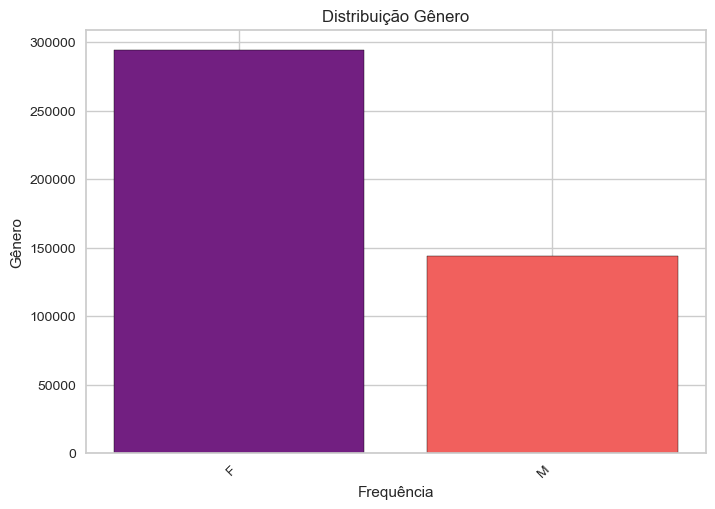

In [164]:
# Chama a função 'distribution' para gerar um gráfico de distribuição
# application_record: dataframe que contém os dados a serem analisados
# 'Gênero': título do gráfico que será exibido
# 'CODE_GENDER': coluna do dataframe que contém os dados de gênero a serem plotados
distribution_bar(application_record, 'Gênero', 'CODE_GENDER', 2)

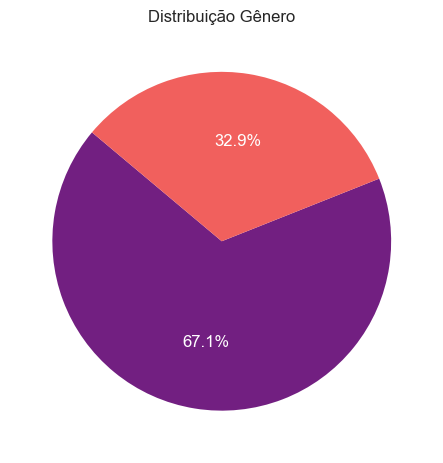

In [165]:
distribution_pie(application_record, 'Gênero', 'CODE_GENDER', 2)

In [166]:
# Acessa a coluna 'CODE_GENDER' do DataFrame 'application_record'
# e conta a frequência de cada valor único na coluna.
# O parâmetro 'normalize=True' faz com que o resultado seja expresso
# como uma fração do total, ou seja, mostra a proporção de cada gênero
application_record['CODE_GENDER'].value_counts(normalize=True)

CODE_GENDER
F    0.671378
M    0.328622
Name: proportion, dtype: float64

- Nos gráficos apresentados mostram a distribuição de gênero em um conjunto de dados, representado pelo número de registros classificados como masculino (M) e feminino (F). O eixo vertical representa a quantidade de registros e o eixo horizontal representa o gênero.
- Observando os dados, pode-se notar que há uma maior frequência de registros femininos (F) em comparação com os masculinos (M). Especificamente, há aproximadamente 300.000 (67.1%) registros femininos e 100.000 (32.9%) registros masculinos.
- Isso pode sugerir várias coisas, como uma maior propensão das mulheres a solicitar crédito ou que a base de dados tem uma maior representatividade feminina.

##### Distribuição da Idade

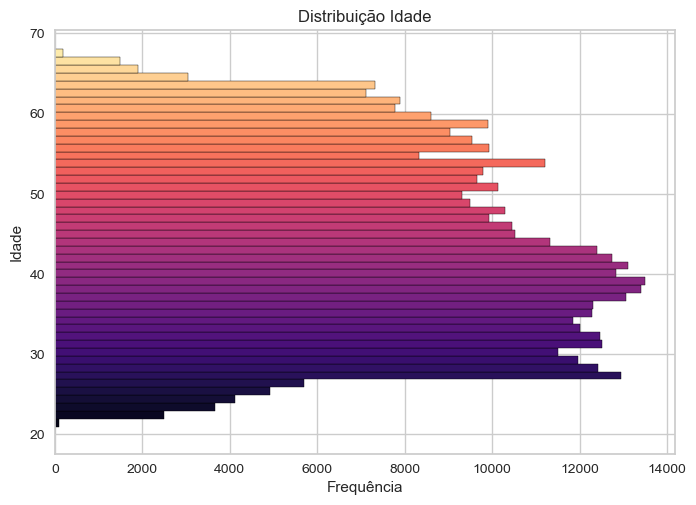

In [167]:
# Chama a função 'distribution' para gerar um gráfico de distribuição
# application_record: dataframe que contém os dados a serem analisados
# 'Idade': título do gráfico que será exibido
# 'AGE': coluna do dataframe que contém os dados de idades a serem plotados
distribution_hist(application_record, 'Idade', 'AGE', 50, 49)

In [168]:
# Acessa a coluna 'AGE' do DataFrame 'application_record'
# e conta a frequência de cada valor único na coluna
# O parâmetro 'normalize=True' faz com que o resultado seja expresso
# como uma fração do total, ou seja, mostra a proporção de cada idade
application_record['AGE'].value_counts(normalize=True)

AGE
39    0.030791
38    0.030560
41    0.029894
37    0.029774
27    0.029518
40    0.029272
42    0.029053
31    0.028540
32    0.028444
28    0.028310
43    0.028275
36    0.028079
35    0.028015
33    0.027379
29    0.027274
34    0.027010
30    0.026216
44    0.025835
54    0.025580
45    0.024025
46    0.023817
48    0.023502
51    0.023096
47    0.022654
56    0.022649
59    0.022588
53    0.022351
52    0.022029
57    0.021755
49    0.021664
50    0.021236
58    0.020611
60    0.019639
55    0.018969
62    0.017977
61    0.017724
64    0.016723
63    0.016221
26    0.013017
25    0.011202
24    0.009398
23    0.008346
65    0.006949
22    0.005690
66    0.004317
67    0.003412
68    0.000424
21    0.000196
20    0.000002
Name: proportion, dtype: float64

- O gráfico representa a distribuição das idades dos clientes em uma base de dados. Cada barra de cor diferente representa um intervalo de idades, com a frequência (número de pessoas) nesse intervalo mostrada no eixo horizontal.
- O gráfico mostra que há uma distribuição variada de idades entre os clientes. A maior frequência parece estar na faixa dos 30 aos 40 anos, o que pode sugerir que essa é a faixa etária mais ativa em termos de solicitações de crédito, talvez devido a necessidades de financiamento para habitação, educação ou expansão de negócios.

##### Distribuição do Estado Civil

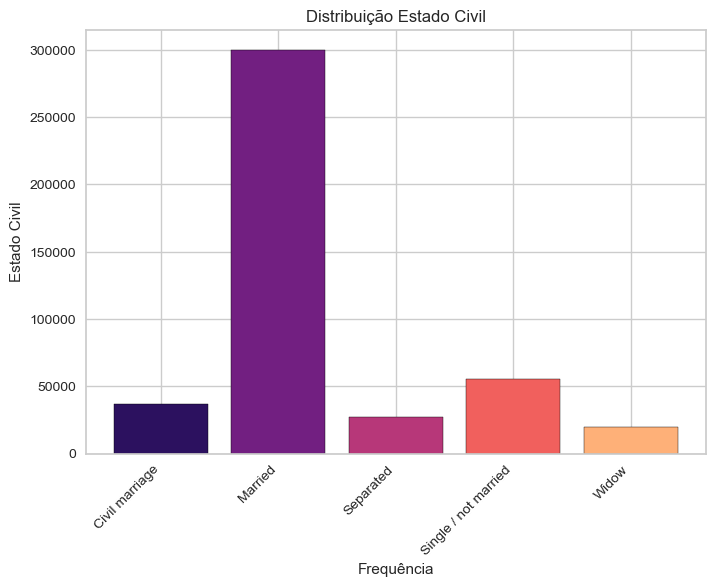

In [169]:
# Chama a função 'distribution' para gerar um gráfico de distribuição
# application_record: dataframe que contém os dados a serem analisados
# 'Estado Civil': título do gráfico que será exibido
# 'NAME_FAMILY_STATUS': coluna do dataframe que contém os dados do estado civil dos clientes a serem plotados
distribution_bar(application_record, 'Estado Civil', 'NAME_FAMILY_STATUS', 5)

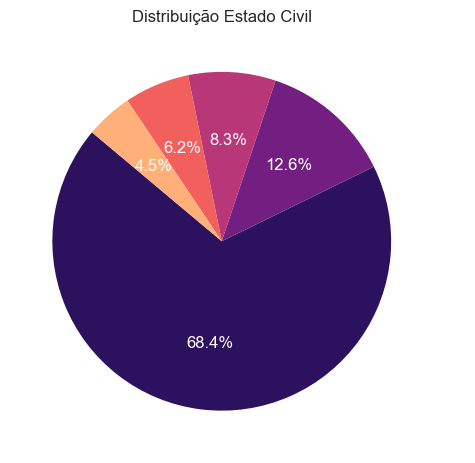

In [170]:
distribution_pie(application_record, 'Estado Civil', 'NAME_FAMILY_STATUS', 5)

In [171]:
# Acessa a coluna 'NAME_FAMILY_STATUS' do DataFrame 'application_record'
# e conta a frequência de cada valor único na coluna
# O parâmetro 'normalize=True' faz com que o resultado seja expresso
# como uma fração do total, ou seja, mostra a proporção de cada estado civil
application_record['NAME_FAMILY_STATUS'].value_counts(normalize=True)

NAME_FAMILY_STATUS
Married                 0.683674
Single / not married    0.126013
Civil marriage          0.083303
Separated               0.062145
Widow                   0.044866
Name: proportion, dtype: float64

- Os gráficos mostram a distribuição do estado civil dos clientes da instituição financeira. É indicado a frequência de cada estado civil na base de dados, com diferentes cores representando diferentes categorias como casado, solteiro/não casado, união civil, separado e viúvo.
- A cor roxa escura representando "Casado" tem a maior frequência, 68,4%, sugerindo que a maioria dos solicitantes dos clientes são casados. Isso pode ser relevante para os modelos de risco de crédito, pois características financeiras, como renda familiar e despesas, podem ser diferentes para pessoas casadas em comparação com solteiros ou separados.
- Outras categorias, como "Solteiro/não casado" e "União civil" também são significativas.

##### Distribuição da Renda Total

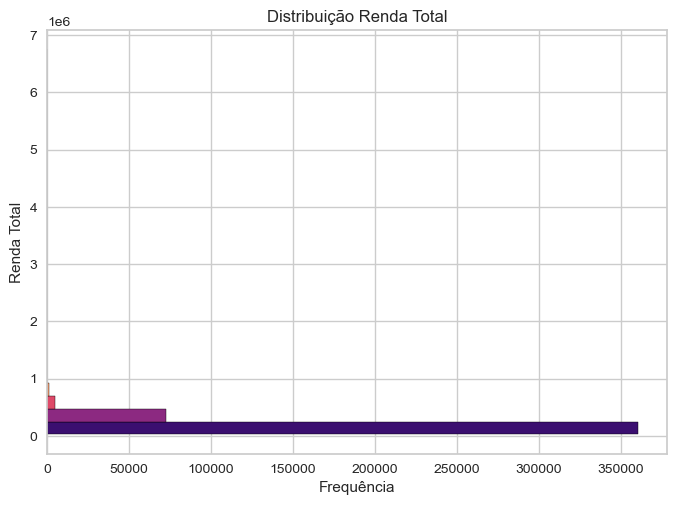

In [172]:
# Chama a função 'distribution' para gerar um gráfico de distribuição
# application_record: dataframe que contém os dados a serem analisados
# 'Renda Total': título do gráfico que será exibido
# 'AMT_INCOME_TOTAL': coluna do dataframe que contém os dados da renda total dos clientes a serem plotados
distribution_hist(application_record, 'Renda Total', 'AMT_INCOME_TOTAL', 4, 30)

- O gráfico mostra a distribuição de renda total dos clientes. Aqui, a maior parte da distribuição está concentrada na faixa de renda mais baixa, com uma frequência muito alta comparada a faixas de renda mais elevadas.
- A barra mais longa no início indica que a grande maioria dos solicitantes tem uma renda na faixa mais baixa disponível nos dados, enquanto as barras seguintes, que quase não são visíveis, sugerem que muito poucas pessoas têm rendas mais altas.

In [173]:
# Acessa a coluna 'AMT_INCOME_TOTAL' do DataFrame 'application_record'
# e conta a frequência de cada valor único na coluna
# O parâmetro 'normalize=True' faz com que o resultado seja expresso
# como uma fração do total, ou seja, mostra a proporção de cada renda total
application_record['AMT_INCOME_TOTAL'].value_counts(normalize=True)

AMT_INCOME_TOTAL
135000.0    0.106896
157500.0    0.090675
180000.0    0.086450
112500.0    0.084317
225000.0    0.077825
              ...   
151425.0    0.000002
133461.0    0.000002
265950.0    0.000002
201150.0    0.000002
36679.5     0.000002
Name: proportion, Length: 866, dtype: float64

##### Distribuição da Ocupação

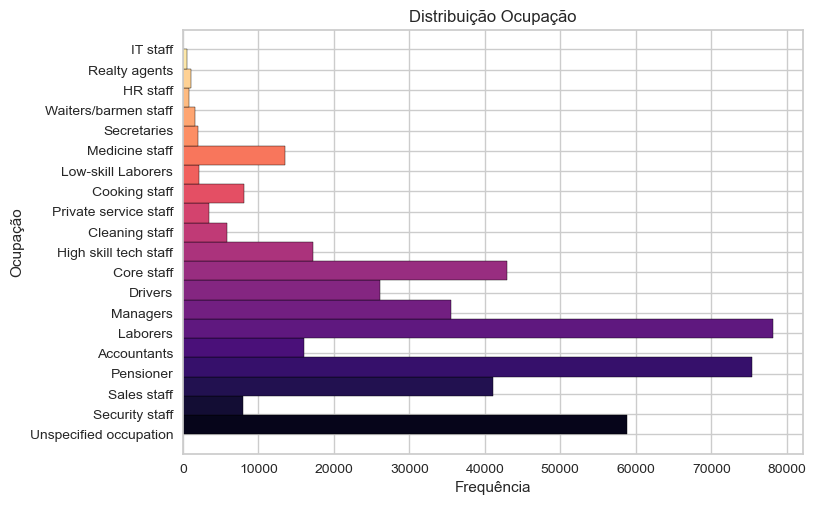

In [174]:
# Chama a função 'distribution' para gerar um gráfico de distribuição
# application_record: dataframe que contém os dados a serem analisados
# 'Ocupação': título do gráfico que será exibido
# 'OCCUPATION_TYPE': coluna do dataframe que contém os dados da ocupação dos clientes a serem plotados
distribution_hist(application_record, 'Ocupação', 'OCCUPATION_TYPE', 20, 20)

In [175]:
# Acessa a coluna 'OCCUPATION_TYPE' do DataFrame 'application_record'
# e conta a frequência de cada valor único na coluna
# O parâmetro 'normalize=True' faz com que o resultado seja expresso
# como uma fração do total, ou seja, mostra a proporção de cada tipo de ocupação
application_record['OCCUPATION_TYPE'].value_counts(normalize=True)

OCCUPATION_TYPE
Laborers                  0.178402
Pensioner                 0.171836
Unspecified occupation    0.134184
Core staff                0.098059
Sales staff               0.093713
Managers                  0.080913
Drivers                   0.059497
High skill tech staff     0.039418
Accountants               0.036448
Medicine staff            0.030827
Cooking staff             0.018417
Security staff            0.018228
Cleaning staff            0.013325
Private service staff     0.007879
Low-skill Laborers        0.004880
Secretaries               0.004661
Waiters/barmen staff      0.003797
Realty agents             0.002374
HR staff                  0.001765
IT staff                  0.001377
Name: proportion, dtype: float64

- O gráfico mostra a distribuição de ocupações entre os clientes da instituição financeira. As barras representam a frequência de cada tipo de ocupação, indicando quantas pessoas de cada categoria profissional estão representadas na base de dados.
- <b>Diversidade Ocupacional:</b> O gráfico exibe uma variedade de ocupações, desde trabalhadores não especificados até pessoal de alta qualificação técnica e gerentes. Cada categoria profissional pode ter diferentes níveis de estabilidade de renda e riscos associados, que são importantes para a avaliação de crédito.
- <b>Profissões de Alto Risco:</b> Algumas profissões podem ser consideradas de maior risco devido à natureza contratual ou sazonal do trabalho (como garçons ou trabalhadores temporários). Isso pode afetar a probabilidade de inadimplência e, consequentemente, a análise de risco de crédito.
- <b>Profissões de Baixo Risco:</b> Ocupações estáveis e bem remuneradas, como gerentes e profissionais de alta tecnologia, geralmente indicam uma maior estabilidade financeira, o que pode resultar em uma melhor pontuação de crédito.

##### Distribuição do Tipo de Educação

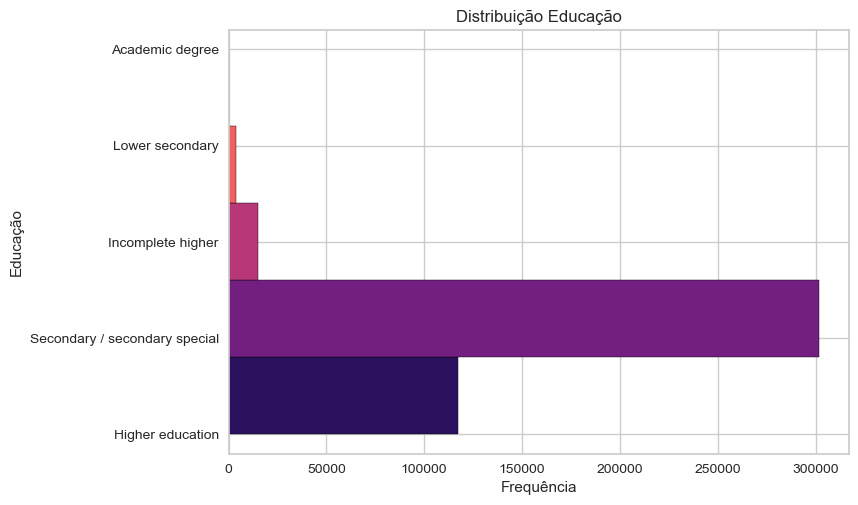

In [176]:
# Chama a função 'distribution' para gerar um gráfico de distribuição
# application_record: dataframe que contém os dados a serem analisados
# 'Educação': título do gráfico que será exibido
# 'NAME_EDUCATION_TYPE': coluna do dataframe que contém os dados do tipo de educação dos clientes a serem plotados
distribution_hist(application_record, 'Educação', 'NAME_EDUCATION_TYPE', 5, 5)

In [177]:
# Acessa a coluna 'NAME_EDUCATION_TYPE' do DataFrame 'application_record'
# e conta a frequência de cada valor único na coluna
# O parâmetro 'normalize=True' faz com que o resultado seja expresso
# como uma fração do total, ou seja, mostra a proporção de cada tipo de educação
application_record['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

NAME_EDUCATION_TYPE
Secondary / secondary special    0.688212
Higher education                 0.267980
Incomplete higher                0.033858
Lower secondary                  0.009238
Academic degree                  0.000712
Name: proportion, dtype: float64

- Este gráfico demonstra a distribuição dos níveis educacionais entre os clientes da instituição financeira. As barras representam a frequência de cada nível educacional entre os clientes.
- A maior parte dos solicitantes de crédito possui "Secondary / secondary special" (ensino médio ou equivalente), como indicado pela barra roxa mais longa. Este grupo pode incluir uma ampla gama de solicitantes com diferentes perfis de risco. Alguns podem ter estabilidade financeira e emprego estável, enquanto outros podem estar em posições mais vulneráveis financeiramente.
- Em seguida, o segundo grupo mais numeroso é o de pessoas com "Higher education" (educação superior), que também é representado por uma barra significativa. Solicitantes com educação superior geralmente têm acesso a melhores oportunidades de emprego e rendimentos mais altos, o que pode se traduzir em um menor risco de crédito. Este grupo pode ser considerado menos arriscado e, portanto, pode obter condições de crédito mais favoráveis.


##### Distribuição do Tipo de Moradia

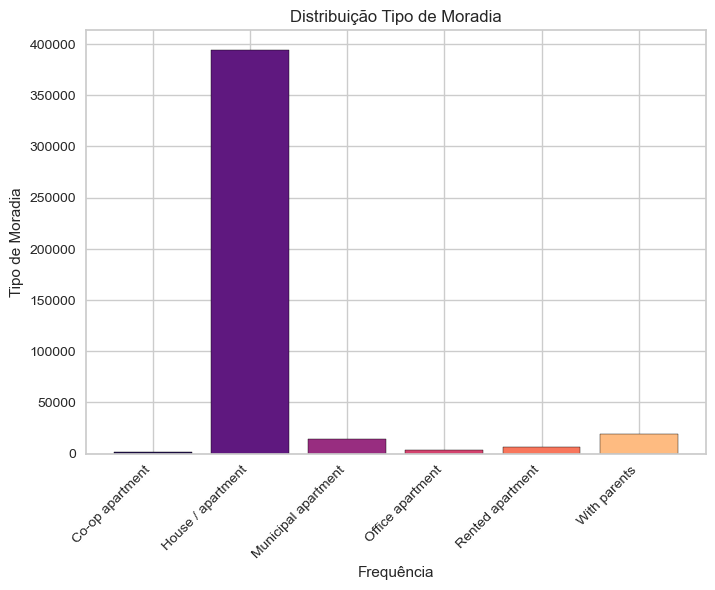

In [178]:
distribution_bar(application_record, 'Tipo de Moradia', 'NAME_HOUSING_TYPE', 6)

In [179]:
# Acessa a coluna 'NAME_HOUSING_TYPE' do DataFrame 'application_record'
# e conta a frequência de cada valor único na coluna
# O parâmetro 'normalize=True' faz com que o resultado seja expresso
# como uma fração do total, ou seja, mostra a proporção de cada tipo de moradia
application_record['NAME_HOUSING_TYPE'].value_counts(normalize=True)

NAME_HOUSING_TYPE
House / apartment      0.898021
With parents           0.043500
Municipal apartment    0.032410
Rented apartment       0.013621
Office apartment       0.008939
Co-op apartment        0.003510
Name: proportion, dtype: float64

- O gráfico mostra a distribuição dos diferentes tipos de moradia entre uma população, representada pela frequência de cada tipo no eixo horizontal ("Frequência") e pelos tipos de moradia no eixo vertical ("Tipo de Moradia").
- A coluna mais alta corresponde ao tipo "House / apartment", indicando que a maioria das pessoas na amostra reside nesse tipo de moradia, com uma frequência de aproximadamente 350.000. Os outros tipos de moradia têm frequências significativamente menores, com "Municipal apartment" sendo o segundo mais comum, seguido por "With parents". Os tipos "Co-op apartment", "Office apartment" e "Rented apartment" têm frequências relativamente baixas em comparação.
- O gráfico utiliza diferentes cores para cada barra, e o eixo das categorias está inclinado para facilitar a leitura dos rótulos. A distribuição claramente indica uma predominância significativa de residências do tipo "House / apartment".

#### Analisando as Distribuições dos Dados no DataFrame 'credit_record'

##### Distribuição do Status de Crédito

**STATUS**: 
   - 0: 1-29 dias em atraso
   - 1: 30-59 dias em atraso
   - 2: 60-89 dias em atraso
   - 3: 90-119 dias em atraso
   - 4: 120-149 dias em atraso
   - 5: dívidas vencidas ou incobráveis, baixas por mais de 150 dias
   - C: quitado naquele mês
   - X: nenhum empréstimo para o mês

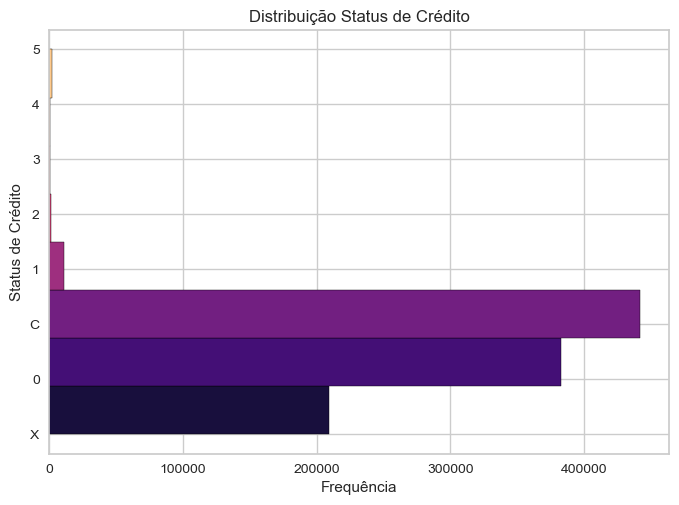

In [180]:
# Chama a função 'distribution' para gerar um gráfico de distribuição
# credit_record: dataframe que contém os dados a serem analisados
# 'Status de Crédito': título do gráfico que será exibido
# 'STATUS': coluna do dataframe que contém os dados do tipo de educação dos clientes a serem plotados
distribution_hist(credit_record, 'Status de Crédito', 'STATUS', 8, 8)

In [181]:
# Acessa a coluna 'STATUS' do DataFrame 'credit_record'
# e conta a frequência de cada valor único na coluna
# O parâmetro 'normalize=True' faz com que o resultado seja expresso
# como uma fração do total, ou seja, mostra a proporção de cada tipo de STATUS
credit_record['STATUS'].value_counts(normalize=True)

STATUS
C    0.421554
0    0.365372
X    0.199537
1    0.010576
5    0.001615
2    0.000828
3    0.000305
4    0.000213
Name: proportion, dtype: float64

- O gráfico mostra a distribuição do status de crédito dos clientes de uma instituição financeira. Os diferentes status indicam a condição do crédito de um cliente em um determinado mês, variando de pagamentos em dia a diferentes níveis de atraso e até situações em que as dívidas são consideradas incobráveis.
- <b>Predominância dos Status "C":</b> A barra mais longa no gráfico corresponde ao status "C", que indica que a maioria dos clientes quitou suas obrigações de crédito no mês em questão. Isso é um bom sinal de solvência e capacidade de pagamento da base de clientes, sugerindo que a maioria dos clientes está em dia com seus pagamentos.
- O status "C" tem aproximadamente 42.16% de frequência, o status "0" tem cerca de 36.54%, e o status "X" tem aproximadamente 19.94%. Esses valores estão alinhados com o que é visualmente aparente no gráfico, onde "C" e "0" são muito frequentes, e os outros status têm uma presença muito menor

#### Gráficos de dispersão

A função scatter_plot definida facilita a criação de gráficos de dispersão para qualquer coluna numérica do dataset, permitindo uma análise rápida e eficiente de múltiplas variáveis em relação aos IDs dos clientes. Basta chamar a função com os parâmetros apropriados: o dataframe, a coluna desejada para análise e a cor preferida para os pontos no gráfico.

In [182]:
# Definindo a função scatter_plot para criar um gráfico de dispersão
def scatter_plot(df, col, color):
    # Cria um gráfico de dispersão usando os dados da coluna 'ID' como eixo x e 'col' como eixo y
    #plt.figure(figsize=(5, 3))
    sns.scatterplot(x = 'ID', y = col, data = df, color = color)
    plt.title(f'Dispersão de ID por {col}')   # Define o título do gráfico, incluindo o nome da coluna para clarificar o que está sendo visualizado
    plt.show() # Exibe o gráfico

##### Dispersão de ID por 'CNT_CHILDREN'

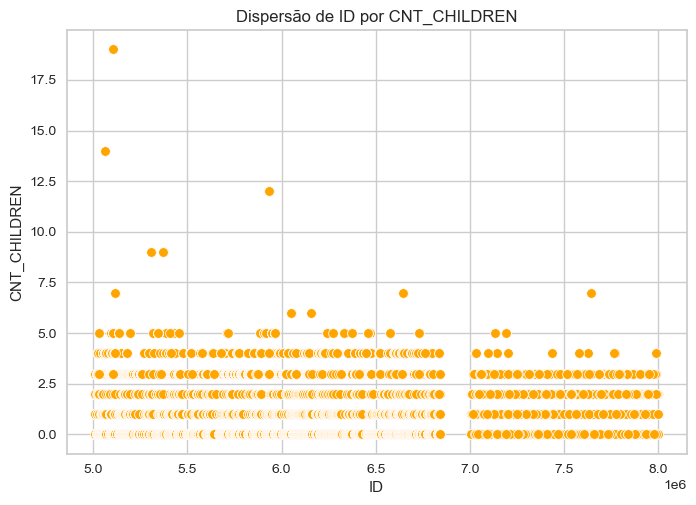

In [183]:
# Chamando a função scatter_plot com o DataFrame 'application_record', coluna 'CNT_CHILDREN', e cor 'orange'
scatter_plot(application_record, 'CNT_CHILDREN', 'orange')

- A maioria dos clientes tem entre 0 e 3 filhos, como indicado pela densidade dos pontos nas linhas mais baixas do gráfico.
- Existem também alguns clientes com um número maior de filhos, com alguns casos extremos onde o número chega a 15 ou mais filhos.
- O gráfico mostra claramente outliers com um número de filhos significativamente mais alto do que a média. Esses pontos podem indicar famílias excepcionalmente grandes ou erros de entrada de dados.

##### Dispersão de ID por 'AMT_INCOME_TOTAL'

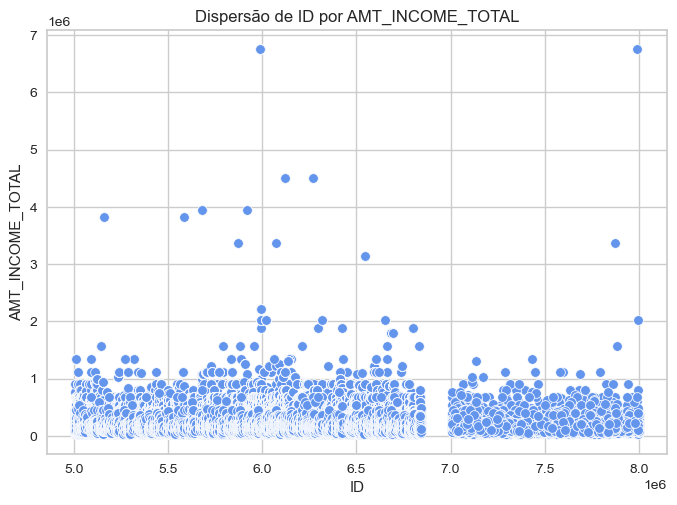

In [184]:
# Chamando a função scatter_plot com o DataFrame 'application_record', coluna 'AMT_INCOME_TOTAL', e cor 'cornflowerblue'
scatter_plot(application_record, 'AMT_INCOME_TOTAL', 'cornflowerblue')

- A maioria dos pontos está concentrada na parte inferior do gráfico, indicando que a maioria dos clientes tem uma renda dentro de uma faixa mais comum ou típica.
- Existem alguns pontos espalhados muito acima dos outros, sugerindo a presença de clientes com rendas significativamente mais altas. Esses clientes podem ser considerados outliers em termos de renda.

##### Dispersão de ID por 'AMT_INCOME_TOTAL'

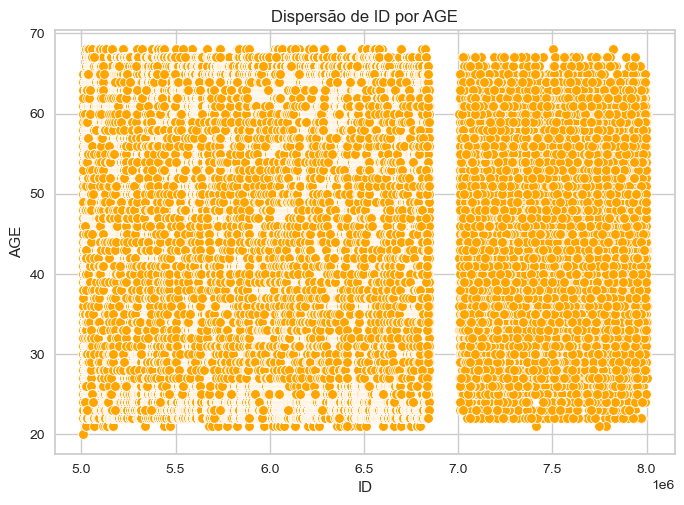

In [185]:
# Chamando a função scatter_plot com o DataFrame 'application_record', coluna 'AGE', e cor 'orange'
scatter_plot(application_record, 'AGE', 'orange')

- Os clientes estão distribuídos em uma ampla faixa etária, de jovens adultos a idosos, o que é típico para um banco de dados de uma instituição financeira.
- A distribuição contínua de idades sugere que a idade é uma variável bem registrada, oferecendo uma base sólida para análises demográficas.

##### Dispersão de ID por 'YEARS_EMPLOYED'

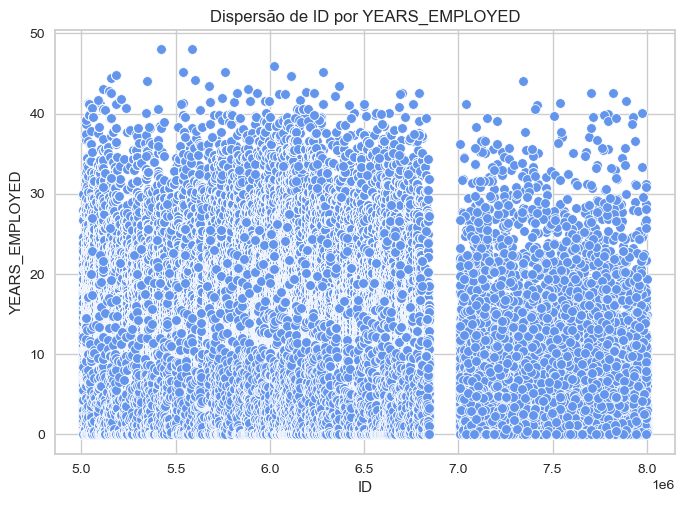

In [186]:
# Chamando a função scatter_plot com o DataFrame 'application_record', coluna 'YEARS_EMPLOYED', e cor 'cornflowerblue'
scatter_plot(application_record, 'YEARS_EMPLOYED', 'cornflowerblue')

- A maioria dos clientes tem até 10 anos de emprego, com uma grande concentração de pontos na parte inferior do gráfico, indicando uma predominância de empregos mais recentes ou de menor duração.
- O gráfico mostra alguns valores muito altos que parecem irrealisticamente elevados para anos de emprego, possivelmente ultrapassando a idade típica de aposentadoria. Estes podem ser erros de dados, entradas incorretas, ou representar uma codificação específica para certos tipos de emprego ou status de aposentadoria.

##### Dispersão de ID por 'FLAG_MOBIL'

<Axes: xlabel='ID', ylabel='FLAG_MOBIL'>

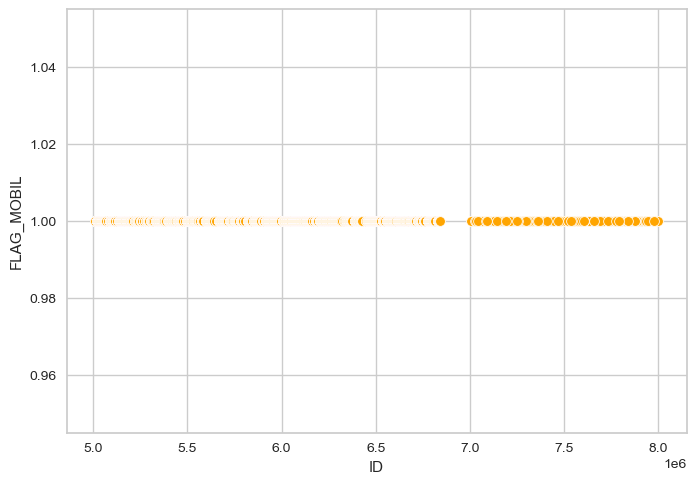

In [187]:
# Chamando a função scatter_plot com o DataFrame 'application_record', coluna 'FLAG_MOBIL', e cor 'orange'
#scatter_plot(application_record, 'FLAG_MOBIL', 'orange')
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=application_record, color= 'orange')

- O gráfico de dispersão exibido mostra a relação entre o ID do cliente e a presença de um telefone móvel (FLAG_MOBIL). Neste gráfico, todos os pontos estão alinhados em uma única linha horizontal, indicando que o valor para FLAG_MOBIL é constante para todos os clientes.
- A falta de variação sugere que FLAG_MOBIL pode não ser útil para análises diferenciadas ou modelagem preditiva, já que não oferece discriminação entre diferentes clientes. Todos os clientes têm a mesma característica em relação a este atributo.

##### Dispersão de ID por 'FLAG_PHONE'

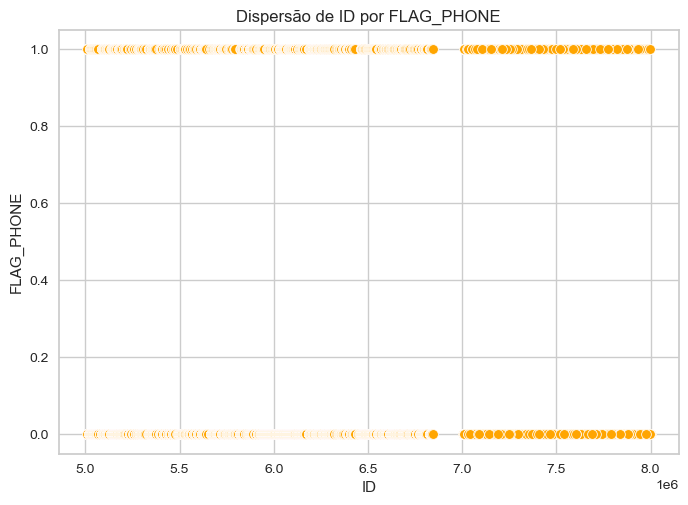

In [188]:
# Chamando a função scatter_plot com o DataFrame 'application_record', coluna 'FLAG_PHONE', e cor 'orange'
scatter_plot(application_record, 'FLAG_PHONE', 'orange')

- O gráfico claramente mostra dois níveis: uma linha na altura 1, indicando clientes que possuem telefone fixo, e uma linha na altura 0, indicando clientes que não possuem telefone fixo. Esta distribuição sugere que FLAG_PHONE é uma variável binária.
- A densidade dos pontos na linha superior (valor 1) é notavelmente menor do que na linha inferior (valor 0), indicando que uma menor proporção de clientes possui telefone fixo comparado àqueles que não possuem.

##### Dispersão de ID por 'FLAG_EMAIL'

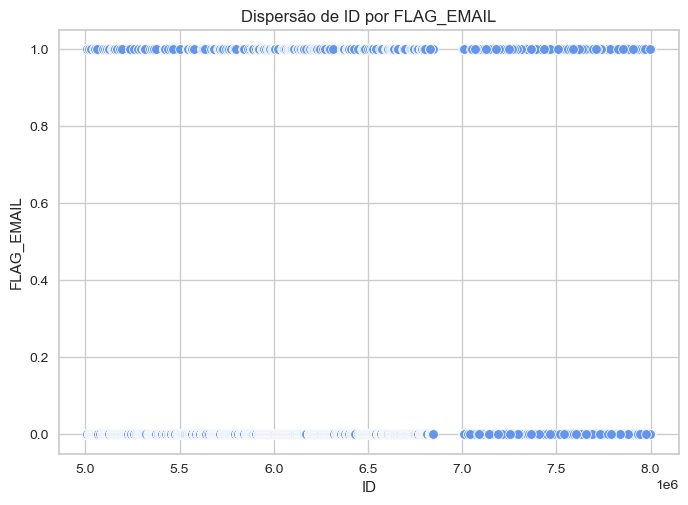

In [189]:
# Chamando a função scatter_plot com o DataFrame 'application_record', coluna 'FLAG_EMAIL', e cor 'cornflowerblue'
scatter_plot(application_record, 'FLAG_EMAIL', 'cornflowerblue')

- Há uma clara distinção entre dois grupos: uma linha na altura 1, indicando clientes que possuem e-mail, e uma linha na altura 0, para aqueles que não possuem.
- A linha no nível 1 tem uma densidade de pontos visivelmente maior, sugerindo que a maioria dos clientes tem e-mail registrado.

##### Dispersão de ID por 'CNT_FAM_MEMBERS'

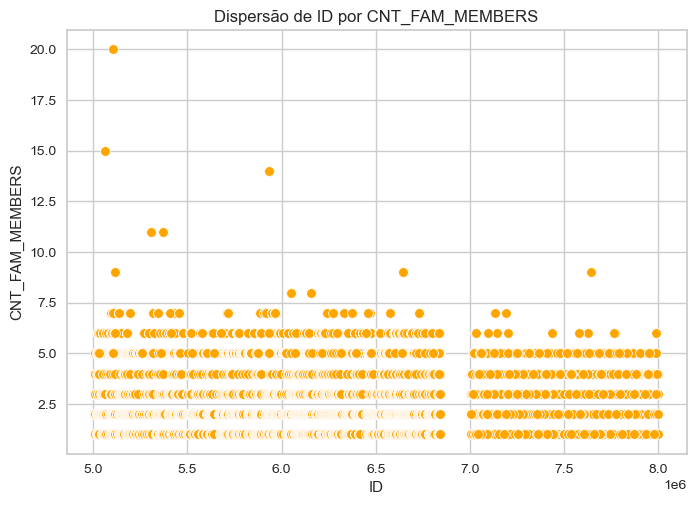

In [190]:
# Chamando a função scatter_plot com o DataFrame 'application_record', coluna 'CNT_FAM_MEMBERS', e cor 'orange'
scatter_plot(application_record, 'CNT_FAM_MEMBERS', 'orange')

- A maior parte dos clientes tem entre 1 e 4 membros em suas famílias, como indicado pela maior densidade de pontos nessas linhas. Essa distribuição é típica para famílias individuais, casais, e famílias com um ou dois filhos.
- Existem também registros de famílias maiores, com alguns pontos indicando até 20 membros. Estes são claramente outliers, representando famílias excepcionalmente grandes ou potenciais erros de entrada de dados.

#### Verificando Outliers no DataFrame 'application_record'

Foi criado uma função outliers para identificar valores atípicos (outliers) em uma coluna específica do DataFrame application_record. A função calcula os limites inferior e superior com base no intervalo interquartil (IQR), um método robusto para a detecção de outliers. Valores que estão significativamente abaixo do primeiro quartil (Q1) ou acima do terceiro quartil (Q3) são considerados outliers e seus índices são retornados para análise posterior. A identificação de outliers é uma etapa crucial na limpeza e preparação de dados, pois esses valores podem influenciar negativamente os resultados das análises.

In [191]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25) # Calcula o primeiro quartil (25%)
    Q3 = df[column].quantile(0.75) # Calcula o terceiro quartil (75%)
    IQR = Q3 - Q1 # Calcula o intervalo interquartil (IQR)
    lower_bound = Q1 - 1.5 * IQR # Define o limite inferior para detecção de outliers
    upper_bound = Q3 + 1.5 * IQR # Define o limite superior para detecção de outliers
    outliers_index = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # Identifica os índices dos outliers
    return outliers_index # Retorna os outliers encontrados

In [192]:
# Exibe as estatísticas descritivas do DataFrame `application_record`
# Isso incluirá métricas como média, desvio padrão, valores mínimos, máximos e quartis
application_record.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5.609362e+06,6.047720e+06,6.454161e+06,7.999952e+06
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,1.215000e+05,1.609402e+05,2.250000e+05,6.750000e+06
AGE,438510.0,4.329590e+01,11.459491,20.0,3.400000e+01,4.200000e+01,5.300000e+01,6.800000e+01
YEARS_EMPLOYED,438510.0,5.948114e+00,6.563884,0.0,1.015743e+00,4.016427e+00,8.495551e+00,4.799726e+01
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01


- Com base na análise descritiva do DataFrame application_record, podemos observar várias estatísticas importantes sobre os dados. Por exemplo, a média da variável CNT_CHILDREN é de aproximadamente 0,42, indicando que a maioria dos registros tem menos de um filho, com um valor máximo de 19 filhos em alguns casos extremos. O AMT_INCOME_TOTAL mostra uma ampla variação na renda total dos registros, com uma média em torno de 187.525,45 e um valor máximo de 6.750.000.
- A variável AGE, que representa a idade, tem uma média de cerca de 43 anos, com um desvio padrão de aproximadamente 11,45 anos, o que sugere uma distribuição relativamente dispersa das idades. A coluna YEARS_EMPLOYED mostra uma média de 5,95 anos de experiência profissional, com alguns registros indicando até 48 anos, o que pode sugerir inconsistências ou erros nos dados.
- Além disso, os indicadores binários como FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, e FLAG_EMAIL são majoritariamente iguais a 1, o que sugere que a maioria dos registros possui esses meios de contato ativos.

##### Verificando e tratando Outliers em 'CNT_CHILDREN'

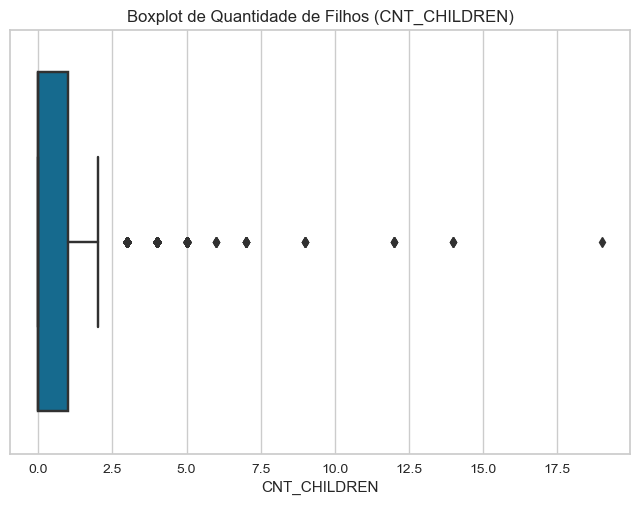

In [193]:
# Criando o boxplot para visualizar a distribuição da quantidade de filhos
sns.boxplot(x = application_record['CNT_CHILDREN'])
plt.title('Boxplot de Quantidade de Filhos (CNT_CHILDREN)')
plt.show()

- O gráfico boxplot da variável CNT_CHILDREN revela a presença significativa de outliers na quantidade de filhos. A maioria dos registros apresenta valores concentrados entre 0 e 2 filhos, conforme indicado pela caixa do boxplot. No entanto, há uma dispersão considerável de valores fora desse intervalo, com alguns registros indicando até 19 filhos.

In [194]:
# Identifica os outliers na coluna 'CNT_CHILDREN'
outliers_children = outliers(application_record, 'CNT_CHILDREN')
print(f'Número de outliers em CNT_CHILDREN: {outliers_children.shape[0]}')

Número de outliers em CNT_CHILDREN: 6074


In [195]:
# Removendo os outliers detectados em 'CNT_CHILDREN'
application_record = application_record[~application_record['CNT_CHILDREN'].isin(outliers_children['CNT_CHILDREN'])]

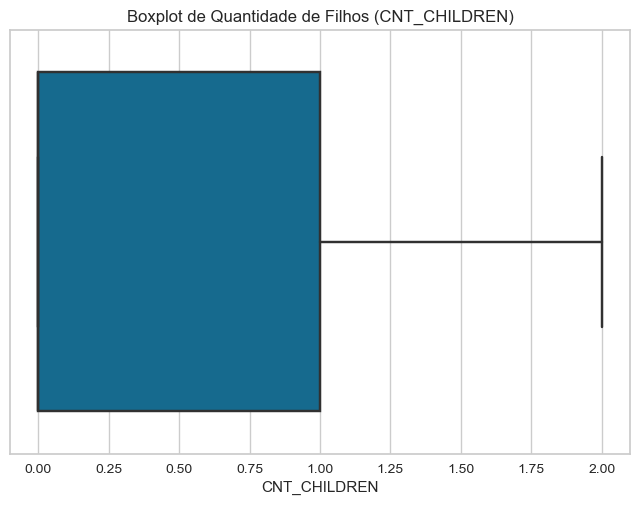

In [196]:
# Criando o boxplot para visualizar a distribuição de 'CNT_CHILDREN'
sns.boxplot(x = application_record['CNT_CHILDREN'])
plt.title('Boxplot de Quantidade de Filhos (CNT_CHILDREN)')
plt.show()

- Após a remoção dos outliers da variável CNT_CHILDREN, o novo boxplot revela uma distribuição muito mais concentrada e sem valores extremos.
- Inicialmente, foram identificados 6.074 outliers, que distorciam a visualização da distribuição dos dados. Com a exclusão desses outliers, agora observamos que a maioria dos registros tem entre 0 e 2 filhos, o que reflete uma distribuição mais típica e esperada para a variável.

##### Verificando e tratando Outliers em 'AMT_INCOME_TOTAL'

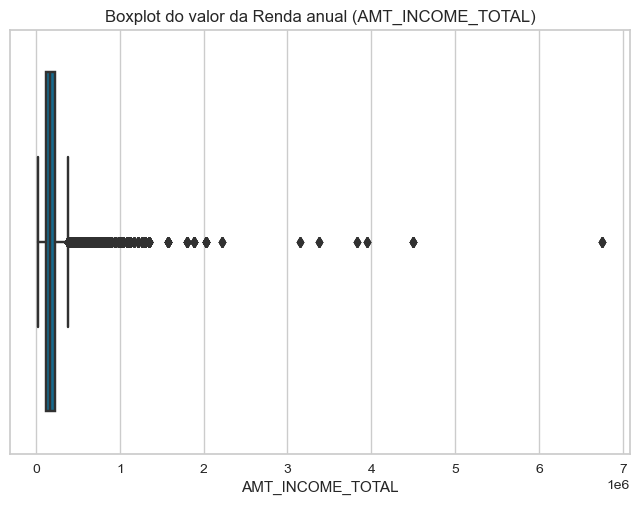

In [197]:
# Criando o boxplot para visualizar a distribuição de 'AMT_INCOME_TOTAL'
sns.boxplot(x = application_record['AMT_INCOME_TOTAL'])
plt.title('Boxplot do valor da Renda anual (AMT_INCOME_TOTAL)')
plt.show()

- O boxplot da variável AMT_INCOME_TOTAL revela a presença de diversos outliers no valor da renda anual dos registros. Observa-se que a maioria dos dados está concentrada em valores mais baixos, com uma grande quantidade de pontos fora da caixa principal do boxplot, indicando rendas consideravelmente superiores à média.

In [198]:
# Identifica os outliers na coluna 'AMT_INCOME_TOTAL'
outliers_income = outliers(application_record, 'AMT_INCOME_TOTAL')
print(f'Número de outliers em AMT_INCOME_TOTAL: {outliers_income.shape[0]}')

Número de outliers em AMT_INCOME_TOTAL: 18776


In [199]:
# Removendo os outliers detectados em 'AMT_INCOME_TOTAL'
application_record = application_record[~application_record['AMT_INCOME_TOTAL'].isin(outliers_income['AMT_INCOME_TOTAL'])]

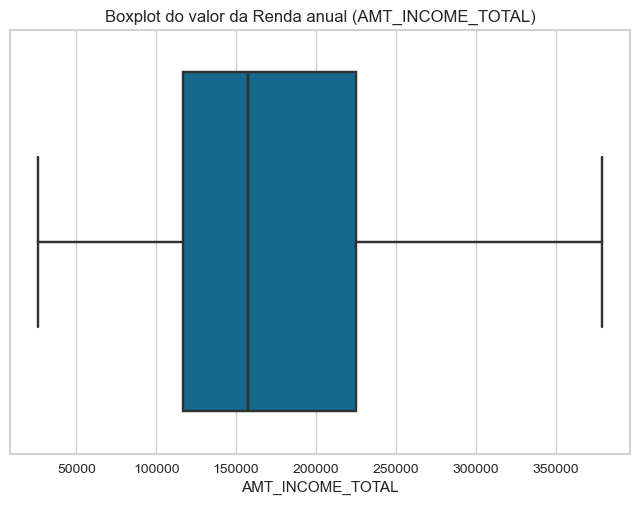

In [200]:
# Criando o boxplot para visualizar a distribuição de 'AMT_INCOME_TOTAL'
sns.boxplot(x = application_record['AMT_INCOME_TOTAL'])
plt.title('Boxplot do valor da Renda anual (AMT_INCOME_TOTAL)')
plt.show()

- Após a remoção de 18.776 outliers na variável AMT_INCOME_TOTAL, o novo boxplot mostra uma distribuição mais concentrada dos valores de renda anual. Agora, a maioria dos valores está entre aproximadamente 50.000 e 350.000, com a mediana em torno de 180.000.
- Esse processo de limpeza tornou a distribuição da renda anual mais representativa da maioria dos casos, eliminando os valores extremos que poderiam distorcer a análise. O resultado é uma visualização mais clara e útil para futuras análises, permitindo uma compreensão mais precisa da distribuição da renda entre os registros.

##### Verificando e tratando Outliers em 'DAYS_BIRTH'

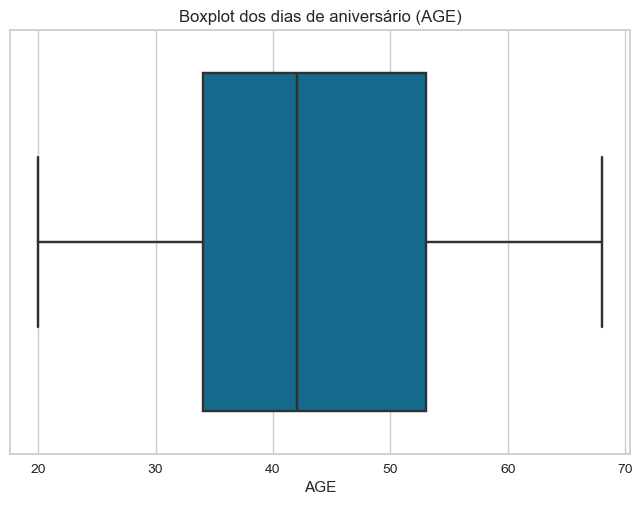

In [201]:
# Criando o boxplot para visualizar a distribuição de 'AGE'
sns.boxplot(x = application_record['AGE'])
plt.title('Boxplot dos dias de aniversário (AGE)')
plt.show()

In [202]:
# Identifica os outliers na coluna 'AGE'
outliers_birth = outliers(application_record, 'AGE')
print(f'Número de outliers em DAYS_BIRTH: {outliers_birth.shape[0]}')

Número de outliers em DAYS_BIRTH: 0


- O boxplot da variável AGE, que representa a idade dos indivíduos, mostra uma distribuição equilibrada sem a presença de outliers. A faixa etária dos registros varia de aproximadamente 20 a 70 anos, com a mediana situada em torno dos 40 anos.
- A ausência de outliers na variável AGE sugere que as idades dos indivíduos estão dentro de um intervalo esperado e consistente, sem valores extremos que possam distorcer a análise. Isso indica que os dados de idade são bastante homogêneos e não necessitam de tratamento adicional para remoção de outliers, o que facilita a análise subsequente.

##### Verificando e tratando Outliers em 'YEARS_EMPLOYED'

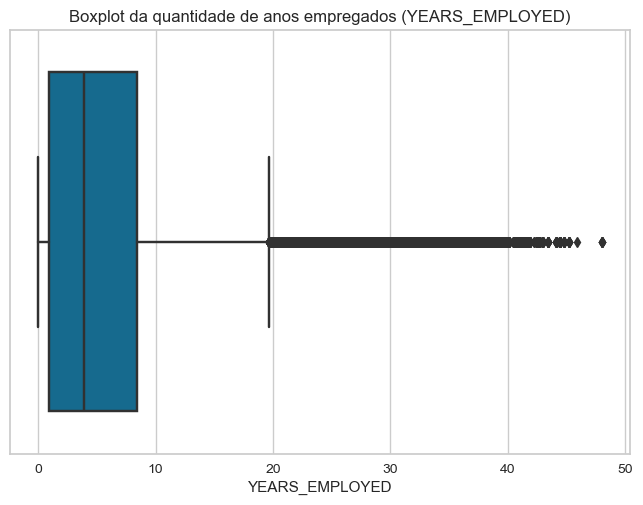

In [203]:
# Criando o boxplot para visualizar a distribuição de 'YEARS_EMPLOYED'
sns.boxplot(x = application_record['YEARS_EMPLOYED'])
plt.title('Boxplot da quantidade de anos empregados (YEARS_EMPLOYED)')
plt.show()

- O boxplot da variável YEARS_EMPLOYED, que representa a quantidade de anos de emprego dos indivíduos, revela a presença de vários outliers. A maior parte dos registros está concentrada entre 0 e 10 anos de emprego, com a mediana em torno de 5 anos. No entanto, observa-se uma cauda longa à direita do boxplot, indicando a presença de outliers significativos com até 50 anos de emprego.
- Esses outliers podem ser resultado de inconsistências nos dados, como registros incorretos ou casos atípicos. 

In [204]:
for i in range(0, 7):
    # Identifica os outliers na coluna 'YEARS_EMPLOYED'
    outliers_years = outliers(application_record, 'YEARS_EMPLOYED')
    print(f'Número de outliers em YEARS_EMPLOYED: {outliers_years.shape[0]}')
    
    # Removendo os outliers detectados em 'AMT_INCOME_TOTAL'
    application_record = application_record[~application_record['YEARS_EMPLOYED'].isin(outliers_years['YEARS_EMPLOYED'])]

Número de outliers em YEARS_EMPLOYED: 20915
Número de outliers em YEARS_EMPLOYED: 5214
Número de outliers em YEARS_EMPLOYED: 1167
Número de outliers em YEARS_EMPLOYED: 269
Número de outliers em YEARS_EMPLOYED: 83
Número de outliers em YEARS_EMPLOYED: 4
Número de outliers em YEARS_EMPLOYED: 0


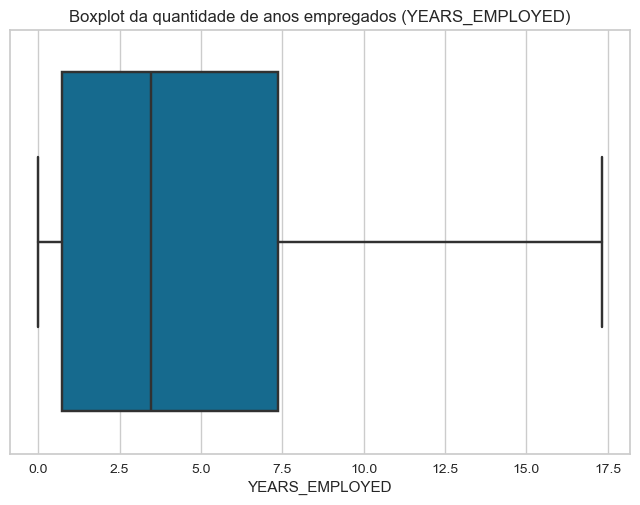

In [205]:
# Criando o boxplot para visualizar a distribuição de 'YEARS_EMPLOYED'
sns.boxplot(x = application_record['YEARS_EMPLOYED'])
plt.title('Boxplot da quantidade de anos empregados (YEARS_EMPLOYED)')
plt.show()

- Após a remoção dos outliers identificados na variável YEARS_EMPLOYED, o boxplot atualizado mostra uma distribuição de dados mais ajustada, refletindo uma experiência de emprego mais realista entre 0 e aproximadamente 18 anos. O processo de remoção foi iterativo, reduzindo significativamente o número de outliers em cada passo, conforme evidenciado pelos números decrescentes de outliers removidos: de 20915 na primeira iteração para zero na última.
- A distribuição ajustada sugere que os anos de emprego agora estão mais alinhados com o que seria esperado na realidade da maioria das populações de trabalho, sem distorções causadas por valores atípicos extremos. 

## Etapa 2: Modelagem de dados

### Tratamento de váriaveis para a modelagem de dados

#### Junção dos DataFrames 'credit_record' e 'application_record'

Para aprimorar a análise e possibilitar uma modelagem de dados mais robusta, é essencial integrar as informações do histórico de crédito com os dados demográficos e financeiros dos clientes. Nesta etapa, realizamos a junção dos DataFrames credit_record e application_record para consolidar as informações relevantes em um único conjunto de dados.

In [206]:
# Substitui os valores na coluna 'STATUS' do dataframe 'credit_record' 
# de acordo com o mapeamento fornecido. Os valores 'X' e 'C' são substituídos respectivamente por 10 e 20, 
# enquanto os números são convertidos de strings para inteiros correspondentes
# A operação é realizada in-place, modificando diretamente o dataframe original
credit_record['STATUS'].replace({'X': -1, 'C' : -1, '0' : 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}, inplace = True)

- Primeiramente, substituímos os valores de status de crédito em credit_record para facilitar análises subsequentes. Os códigos 'X' e 'C', que indicam créditos fechados ou sem uso, são convertidos para '-1', enquanto os códigos que indicam diferentes níveis de atraso no pagamento ('0', '1', '2', '3', '4', '5') são tratados como inteiros correspondentes, preservando a gravidade do atraso.

In [207]:
# Agrupa os dados do DataFrame 'credit_record' por 'ID' e calcula o valor máximo para cada coluna agrupada
credit_record_group = credit_record.groupby('ID').agg(max).reset_index() 

In [208]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3.104723,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.353183,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.353183,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.353183,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.353183,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62,0.000000,1,0,0,0,Pensioner,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,43,8.232717,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22,1.018480,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59,0.000000,1,0,0,0,Pensioner,2.0


- Agrupamos os dados em credit_record por ID, calculando o status máximo para cada cliente. Isso ajuda a identificar o pior cenário de crédito para cada cliente, fornecendo uma visão conservadora do comportamento de crédito ao longo do tempo.

In [209]:
# Exibindo as primeiras linhas do DataFrame 'credit_record_group' para uma rápida inspeção
credit_record_group.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,-1
3,5001714,0,-1
4,5001715,0,-1


In [210]:
# Realiza um merge (junção) entre os DataFrames application_record e credit_record_group
# 'ID': A coluna usada para fazer a junção entre os dois DataFrames
application_record = application_record.merge(credit_record_group, on = 'ID')

- Após o tratamento de credit_record, realizamos uma junção com application_record usando o ID como chave. A junção é feita pelo método 'inner', garantindo que apenas clientes com registros em ambos os conjuntos de dados sejam mantidos. Isso assegura a integridade e a completude dos dados analisados.

In [211]:
# Remove a coluna 'MONTHS_BALANCE' do DataFrame 'application_record'
# axis = 1 especifica que a operação deve ser realizada nas colunas
# inplace = True faz com que a modificação seja feita diretamente no DataFrame original, sem criar uma cópia
application_record.drop(['MONTHS_BALANCE'], axis = 1, inplace = True)

In [212]:
# Reseta o índice do DataFrame 'application_record' e altera o próprio DataFrame sem criar uma cópia
application_record.reset_index(inplace = True)

- Após a junção, removemos colunas redundantes ou irrelevantes para a modelagem, como 'MONTHS_BALANCE', e redefinimos o índice do DataFrame final para facilitar manipulações futuras.

In [213]:
# Exibindo as primeiras 5 linhas do DataFrame para uma visualização das modificações
application_record.shape[0]

32155

#### Removendo colunas

In [214]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32155 entries, 0 to 32154
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                32155 non-null  int64  
 1   ID                   32155 non-null  int64  
 2   CODE_GENDER          32155 non-null  object 
 3   FLAG_OWN_CAR         32155 non-null  object 
 4   FLAG_OWN_REALTY      32155 non-null  object 
 5   CNT_CHILDREN         32155 non-null  int64  
 6   AMT_INCOME_TOTAL     32155 non-null  float64
 7   NAME_INCOME_TYPE     32155 non-null  object 
 8   NAME_EDUCATION_TYPE  32155 non-null  object 
 9   NAME_FAMILY_STATUS   32155 non-null  object 
 10  NAME_HOUSING_TYPE    32155 non-null  object 
 11  AGE                  32155 non-null  int64  
 12  YEARS_EMPLOYED       32155 non-null  float64
 13  FLAG_MOBIL           32155 non-null  int64  
 14  FLAG_WORK_PHONE      32155 non-null  int64  
 15  FLAG_PHONE           32155 non-null 

In [215]:
# Remove a coluna 'FLAG_MOBIL' do DataFrame 'application_record'
# axis = 1 especifica que a operação deve ser realizada nas colunas
# inplace = True faz com que a modificação seja feita diretamente no DataFrame original, sem criar uma cópia
application_record.drop(['FLAG_MOBIL'], axis = 1, inplace = True)

#### Codificando as variáveis categóricas

- As colunas categóricas do DataFrame incluem:
    - CODE_GENDER
    - FLAG_OWN_CAR
    - FLAG_OWN_REALTY
    - NAME_INCOME_TYPE
    - NAME_EDUCATION_TYPE
    - NAME_FAMILY_STATUS
    - NAME_HOUSING_TYPE
    - OCCUPATION_TYPE

In [216]:
# Lista das colunas categóricas que serão transformadas em variáveis dummy
categorical_columns = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

# Criação de variáveis dummy para as colunas categóricas no dataframe application_record
# Isso transforma cada categoria única em uma nova coluna
application_record_final = pd.get_dummies(application_record, columns = categorical_columns)

# Exibição das primeiras linhas do dataframe transformado para verificar as novas colunas dummy
application_record_final.head()


,index,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unspecified occupation,OCCUPATION_TYPE_Waiters/barmen staff
0,0,5008806,0,112500.0,58,3.104723,0,0,0,2.0,...,False,False,False,False,False,False,False,True,False,False
1,1,5008808,0,270000.0,52,8.353183,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,False
2,2,5008809,0,270000.0,52,8.353183,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,False
3,3,5008810,0,270000.0,52,8.353183,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,False
4,4,5008811,0,270000.0,52,8.353183,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,False


- Foi aplicada a codificação one-hot nas variáveis categóricas, transformando-as em atributos binários e facilitando assim a sua utilização em modelos de machine learning. Após a codificação, o DataFrame expandiu para 61 colunas, possibilitando uma análise mais detalhada e eficiente dos dados.

#### Identificando se o cliente tem atrasos no pagamento

In [217]:
application_record_final['DELAY'] = (credit_record['STATUS'] > 0).astype(int)

- Foi criado uma nova coluna DELAY em application_record_final que indica se o cliente teve atrasos no pagamento. Essa coluna é derivada da variável STATUS, onde qualquer valor maior que '0' indica um atraso. A conversão é feita para um formato inteiro (0 ou 1), facilitando análises futuras e modelagem, onde '1' indica a presença de atrasos e '0' indica ausência.

#### Normalizando algumas variáveis

In [218]:
# Lista de colunas que serão escaladas
col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED']

In [219]:
# Instanciando o objeto MinMaxScaler
scaler = MinMaxScaler()

In [220]:
# Aplicando o escalonamento MinMax às colunas selecionadas do dataframe
application_record_final[col] = scaler.fit_transform(application_record_final[col])

In [221]:
# Exibindo as primeiras cinco linhas das colunas escaladas para verificar o resultado
application_record_final[col].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,0.0,0.243590,0.333333,0.791667,0.179516
1,0.0,0.692308,0.000000,0.666667,0.482982
2,0.0,0.692308,0.000000,0.666667,0.482982
3,0.0,0.692308,0.000000,0.666667,0.482982
4,0.0,0.692308,0.000000,0.666667,0.482982


- Foi selecionado várias variáveis-chave (CNT_CHILDREN, AMT_INCOME_TOTAL, CNT_FAM_MEMBERS, AGE, YEARS_EMPLOYED) para normalização, visando eliminar discrepâncias de escala que podem afetar negativamente o desempenho dos modelos de machine learning.
- Foi Utilizado o MinMaxScaler, um método de escalonamento que transforma os dados para um intervalo entre 0 e 1, mantendo a estrutura da distribuição enquanto padroniza os intervalos de valores.

### Divisão dos Dados

#### Definindo as Variáveis

In [222]:
# Remover as colunas 'ID' e 'STATUS' do DataFrame application_record_final
X = application_record_final.drop(['ID', 'STATUS'], axis = 1) 
# Atribuir a coluna 'STATUS' à variável y, que será usada como a variável alvo na modelagem
y = application_record_final['STATUS']

- <b>X:</b> Conjunto de características ou variáveis independentes, obtidas ao excluir as colunas ID e STATUS do DataFrame application_record_final. O ID é removido por ser apenas um identificador único que não possui valor preditivo, e STATUS é excluído porque é a variável alvo que queremos prever.
- <b>y:</b> Variável alvo, que neste caso é STATUS. Esta coluna indica o status de crédito do cliente, que queremos prever usando as variáveis independentes.

#### Dividindo os dados em treino e teste

In [223]:
# Exibe um resumo das informações sobre o DataFrame 'application_record_final'
application_record_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32155 entries, 0 to 32154
Data columns (total 59 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   index                                              32155 non-null  int64  
 1   ID                                                 32155 non-null  int64  
 2   CNT_CHILDREN                                       32155 non-null  float64
 3   AMT_INCOME_TOTAL                                   32155 non-null  float64
 4   AGE                                                32155 non-null  float64
 5   YEARS_EMPLOYED                                     32155 non-null  float64
 6   FLAG_WORK_PHONE                                    32155 non-null  int64  
 7   FLAG_PHONE                                         32155 non-null  int64  
 8   FLAG_EMAIL                                         32155 non-null  int64  
 9   CNT_FA

- Neste DataFrame não será necessário aplicar LabelEncoder. A maioria das colunas categóricas já está codificada como valores booleanos, o que significa que elas estão prontas para serem usadas diretamente em modelos de machine learning.
- O LabelEncoder é tipicamente usado para converter categorias textuais em números, mas como todas as colunas categóricas neste dataset já estão em um formato numérico adequado (como bool), não é necessária nenhuma conversão adicional, assim sendo possível seguir para a divisão dos dados em conjunto de treinamento e teste.

In [224]:
# Divide os dados em conjuntos de treinamento e teste
# X: Variáveis independentes (características)
# y: Variável dependente (target/label)
# test_size: Percentual de dados reservados para o conjunto de teste (20% neste caso)
# random_state: Define uma semente para garantir que a divisão seja reproduzível
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [225]:
# Exibe as formas (dimensões) dos conjuntos de treinamento e teste
#(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

- Foi utilizado a função train_test_split para dividir os dados em conjuntos de treino e teste. Definimos test_size = 0.3, o que significa que 30% do dataset será usado para teste e os restantes 70% para treino.
- <b>random_state = 42</b> é usado para garantir que a divisão seja reproduzível; ou seja, a mesma divisão será feita cada vez que o código for executado, o que é importante para a consistência durante os testes e a validação do modelo.

### Modelo 1: 

O código apresentado a seguir é uma implementação de um modelo de aprendizado de máquina utilizando a técnica de Random Forest.
- <b>RandomForestClassifier:</b> É um algoritmo de aprendizado de máquina baseado em árvores de decisão, que utiliza o método de ensemble (combinação de múltiplas árvores) para melhorar a precisão das previsões.

In [248]:
# Cria um objeto do classificador RandomForestClassifier
modelo = RandomForestClassifier(criterion = 'gini', n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)
# Treina o modelo de floresta aleatória utilizando os conjuntos de dados de treinamento (X_train para as variáveis independentes
modelo.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

- Parâmetros:
    - <b>criterion = 'gini':</b> Critério usado para medir a qualidade de uma divisão, neste caso, o índice de Gini.
    - <b>n_estimators = 400:</b> Número de árvores na floresta (o modelo combina as previsões dessas 400 árvores).
    - <b>min_samples_split = 2:</b> Número mínimo de amostras necessárias para dividir um nó.
    - <b>min_samples_leaf = 1:</b> Número mínimo de amostras que um nó folha deve ter.
- <b>modelo.fit(X_train, y_train):</b> Treina o modelo usando os dados de treino (X_train) e os rótulos (y_train).

In [249]:
# O método 'predict' aplica o modelo treinado às variáveis independentes
previsoes = modelo.predict(X_test)

- <b>modelo.predict(X_test):</b> Usa o modelo treinado para prever as classes dos dados de teste (X_test).

In [250]:
previsoes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [257]:
# Calcula a precisão do modelo
accuracy = accuracy_score(y_test, previsoes)
print(accuracy)

0.7538485461048049


In [231]:
# Define o índice da árvore específica que deseja visualizar dentro da floresta aleatória
#tree_index = 0
# Acessa o estimador (árvore) específico pelo índice dentro do modelo de floresta aleatória
#tree_to_visualize = modelo.estimators_[tree_index]
#plt.figure(figsize = (20,10)) # Configura o tamanho da figura para a visualização da árvore
# Plota a árvore especificada. Os parâmetros incluem:
# - 'filled': colore os nós para indicar a classe majoritária,
# - 'feature_names': usa os nomes das características do DataFrame, exceto a última coluna que geralmente é o alvo,
# - 'class_names': ativa a exibição dos nomes das classes nos nós,
# - 'rounded': arredonda os cantos dos retângulos dos nós para uma visualização mais agradável
#plot_tree(tree_to_visualize, filled = True, feature_names = application_record_final.columns[:-1], class_names = True, rounded = True)
#plt.show() # Exibe a figura plotada

- Esse trecho está comentado, mas, se ativado, visualizaria uma das árvores do modelo Random Forest usando plot_tree.

In [258]:
# Calcula a acurácia do modelo, que é a fração de previsões corretas entre o total de casos testados
accuracy = accuracy_score(y_test, previsoes)
# Calcula a precisão ponderada, que é a capacidade do classificador de não rotular como positiva uma amostra negativa
# 'average = weighted' considera o desbalanceamento das classes
precision = precision_score(y_test, previsoes, average = 'weighted', zero_division = 0)
# Calcula o recall ponderado, que é a capacidade do classificador de encontrar todas as amostras positivas
# 'average = weighted' ajusta o cálculo ao desbalanceamento de classes
recall = recall_score(y_test, previsoes, average = 'weighted')
# Calcula o score F1 ponderado, que é a média harmônica de precisão e recall
# 'average = weighted' considera a proporção de cada classe
f1 = f1_score(y_test, previsoes, average = 'weighted')
# Imprime as métricas calculadas para fornecer uma visão compreensiva do desempenho do modelo
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall {recall}, F1: {f1}')

Acuracia: 0.7538485461048049, Precisão: 0.7399750702436999, Recall 0.7538485461048049, F1: 0.7458444300314572


- <b>precision_score:</b> Mede a precisão, ou seja, a fração de verdadeiros positivos entre as amostras que foram classificadas como positivas. A média ponderada (average='weighted') é usada para lidar com classes desbalanceadas.
- <b>recall_score:</b> Mede o recall, ou seja, a fração de verdadeiros positivos entre todas as amostras que são realmente positivas.
- <b>f1_score:</b> Combina precisão e recall em uma única métrica, o F1-Score, que é a média harmônica de precisão e recall.

O código treina um modelo de Random Forest, realiza previsões com os dados de teste e avalia o desempenho do modelo utilizando diversas métricas de classificação. A acurácia foi de aproximadamente 75,4%, a precisão 74%, o recall 75,4%, e o F1-Score 74,6%.

### Modelo 2: 

Este segundo código implementa um modelo de Regressão Logística para realizar previsões e avaliar seu desempenho.

In [233]:
# Cria um objeto do classificador RandomForestClassifier
modelo = LogisticRegression(max_iter=1000, solver='lbfgs')
# Treina o modelo de floresta aleatória utilizando os conjuntos de dados de treinamento (X_train para as variáveis independentes
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- <b>LogisticRegression():</b> Cria um modelo de regressão logística, que é comumente usado para problemas de classificação binária, embora possa ser estendido para classificação multiclasse.
- <b>modelo.fit(X_train, y_train):</b> Treina o modelo utilizando os dados de treino (X_train) e os rótulos correspondentes (y_train).

In [234]:
# O método 'predict' aplica o modelo treinado às variáveis independentes
previsoes = modelo.predict(X_test)

In [235]:
previsoes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

- <b>modelo.predict(X_test):</b> Utiliza o modelo treinado para prever as classes dos dados de teste (X_test).

In [245]:
df_previsoes = pd.DataFrame(previsoes, columns=['Previsao'])
(df_previsoes['Previsao'] == 5).sum()

0

In [237]:
# Calcula a precisão do modelo
accuracy = accuracy_score(y_test, previsoes)
print(accuracy)

0.7672212719639248


- <b>accuracy_score(y_test, previsoes):</b> Calcula a acurácia do modelo, que é a proporção de previsões corretas entre todas as previsões realizadas.

In [259]:
# Calcula a acurácia do modelo, que é a fração de previsões corretas entre o total de casos testados
accuracy = accuracy_score(y_test, previsoes)
# Calcula a precisão ponderada, que é a capacidade do classificador de não rotular como positiva uma amostra negativa
# 'average = weighted' considera o desbalanceamento das classes
precision = precision_score(y_test, previsoes, average = 'weighted', zero_division = 0)
# Calcula o recall ponderado, que é a capacidade do classificador de encontrar todas as amostras positivas
# 'average = weighted' ajusta o cálculo ao desbalanceamento de classes
recall = recall_score(y_test, previsoes, average = 'weighted')
# Calcula o score F1 ponderado, que é a média harmônica de precisão e recall
# 'average = weighted' considera a proporção de cada classe
f1 = f1_score(y_test, previsoes, average = 'weighted')
# Imprime as métricas calculadas para fornecer uma visão compreensiva do desempenho do modelo
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall {recall}, F1: {f1}')

Acuracia: 0.7538485461048049, Precisão: 0.7399750702436999, Recall 0.7538485461048049, F1: 0.7458444300314572


- <b>precision_score(y_test, previsoes, average = 'weighted', zero_division = 0):</b> Calcula a precisão ponderada para cada classe, somando a média ponderada de todas as classes. O parâmetro zero_division = 0 impede que a função retorne um erro caso alguma classe não tenha previsões positivas.
- <b>recall_score(y_test, previsoes, average = 'weighted'):</b> Calcula o recall ponderado para cada classe.
- <b>f1_score(y_test, previsoes, average = 'weighted'):</b> Calcula o F1-Score ponderado, que é a média harmônica da precisão e do recall.